In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load data
sales_df = pd.read_excel('/content/Analytics_Assignment.xlsx', sheet_name='dbo.Sales1')
returns_df = pd.read_excel('/content/Analytics_Assignment.xlsx', sheet_name='dbo.Returns1')

In [ ]:
# Display first few rows
print(sales_df.head())
print('-------------------------------------------------------')
print(returns_df.head())

   CustomerID       OrderID    Sales  TransactionDate
0  URBAS27060  11244W2XUWE    902.14         20150109
1  G999A39456  11244W2XVQU   1248.00         20150102
2  WILL25R     110840TSGDF    533.06         20150102
3  WILL25R     110840TSGKN   2306.25         20150102
4  WILL25R     110840TSGNJ    229.66         20150107
-------------------------------------------------------
   CustomerID ReturnDate  ReturnSales       OrderID
0  DDSOF91747   20150403       310.68  020350GQZCED
1  DEANJ58544   20150709       553.02  01175C4MPWU 
2  DEANS61380   20150321      2160.00  022250CWJIH 
3  DEDOJ36741   20150306       566.58  02185KVVDRN 
4  DEEBM26019   20150218      1546.33  02135C5THXR 


In [ ]:
# Convert dates in both DataFrames (assuming format '%Y%m%d')
sales_df['TransactionDate'] = pd.to_datetime(sales_df['TransactionDate'], format='%Y%m%d')
sales_df

,CustomerID,OrderID,Sales,TransactionDate
0,URBAS27060,11244W2XUWE,902.14,2015-01-09
1,G999A39456,11244W2XVQU,1248.00,2015-01-02
2,WILL25R,110840TSGDF,533.06,2015-01-02
3,WILL25R,110840TSGKN,2306.25,2015-01-02
4,WILL25R,110840TSGNJ,229.66,2015-01-07
...,...,...,...,...
33746,BARRJ26936,11194L3WESR,6459.43,2015-01-09
33747,THOMA56650,10064H9IDHO,1828.99,2015-01-03
33748,TRAUE71273,07044K8HZSP,794.95,2015-01-08
33749,ESPOS51802,11224C8XFEK,722.12,2015-01-06


In [ ]:
returns_df['ReturnDate'] = pd.to_datetime(returns_df['ReturnDate'], format='%Y%m%d', errors='coerce')
returns_df

,CustomerID,ReturnDate,ReturnSales,OrderID
0,DDSOF91747,2015-04-03,310.68,020350GQZCED
1,DEANJ58544,2015-07-09,553.02,01175C4MPWU
2,DEANS61380,2015-03-21,2160.00,022250CWJIH
3,DEDOJ36741,2015-03-06,566.58,02185KVVDRN
4,DEEBM26019,2015-02-18,1546.33,02135C5THXR
...,...,...,...,...
15823,TONEP44464,2016-09-10,528.94,03025K8YMVS
15824,TONES59492,2015-04-17,624.34,02075K7RYME
15825,TOPAJ93459,2015-04-15,1441.60,04075K4JALL
15826,TOPEJ40041,2015-03-18,517.88,03115N1BCZI


In [ ]:
# Handle potential missing values (optional)
sales_df.fillna(method='ffill', inplace=True)  # Fill missing values in sales_df (forward fill)
returns_df.fillna(method='ffill', inplace=True)  # Fill missing values in returns_df (forward fill)

# Merge sales and returns data (left join to keep all sales)
merged_df = pd.merge(sales_df, returns_df, on='OrderID', how='left', suffixes=('_sale', '_return'))

# Handle potential data type mismatches (optional)
if not pd.api.types.is_string_dtype(merged_df['OrderID']):
  merged_df['OrderID'] = merged_df['OrderID'].astype(str)  # Ensure OrderID is string for consistent matching



In [ ]:
# 1. Percentage of Sales Resulting in a Return
total_sales = len(sales_df)
returned_sales = merged_df['ReturnSales'].notna().sum()
percentage_sales_with_return = (returned_sales / total_sales) * 100
print(f"Percentage of sales resulting in a return: {percentage_sales_with_return:.2f}%")

Percentage of sales resulting in a return: 4.64%


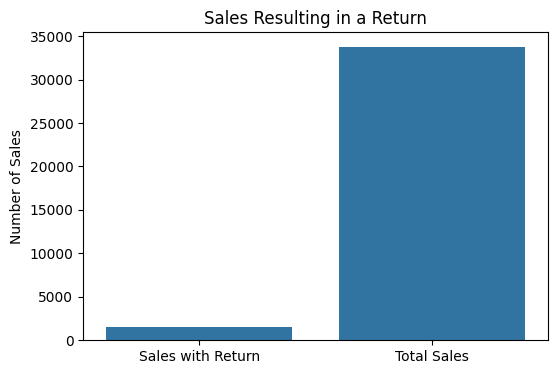

In [ ]:
# Visualization
plt.figure(figsize=(6, 4))
sns.barplot(x=['Sales with Return', 'Total Sales'], y=[returned_sales, total_sales])
plt.title('Sales Resulting in a Return')
plt.ylabel('Number of Sales')
plt.show()

In [ ]:
# 2. Percentage of Full Returns
full_returns = merged_df[merged_df['Sales'] == merged_df['ReturnSales']]
percentage_full_returns = (len(full_returns) / returned_sales) * 100
print(f"Percentage of full returns: {percentage_full_returns:.2f}%")



Percentage of full returns: 18.15%


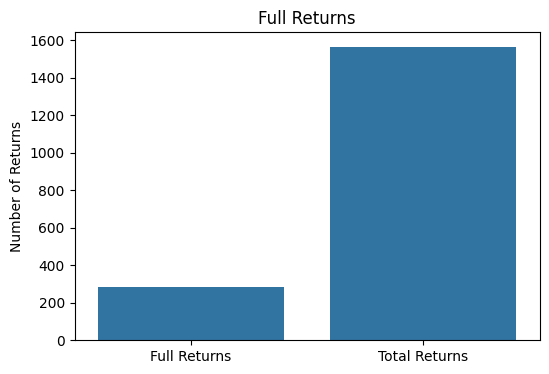

In [ ]:
# Visualization
plt.figure(figsize=(6, 4))
sns.barplot(x=['Full Returns', 'Total Returns'], y=[len(full_returns), returned_sales])
plt.title('Full Returns')
plt.ylabel('Number of Returns')
plt.show()

In [ ]:
# 3. Average Return Percentage
merged_df['ReturnPercentage'] = (merged_df['ReturnSales'] / merged_df['Sales']) * 100
average_return_percentage = merged_df['ReturnPercentage'].mean()
print(f"Average return percentage: {average_return_percentage:.2f}%")

Average return percentage: 52.81%


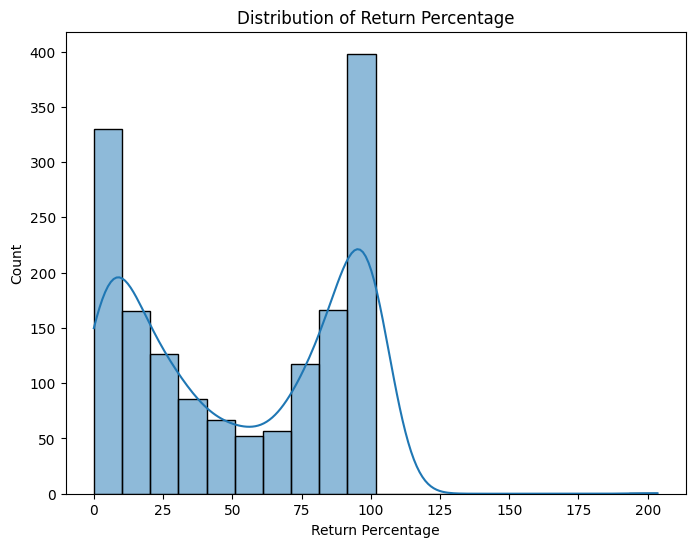

In [ ]:
# Visualization
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['ReturnPercentage'].dropna(), bins=20, kde=True)
plt.title('Distribution of Return Percentage')
plt.xlabel('Return Percentage')
plt.show()

In [ ]:
# 4. Percentage of Returns within 7 Days
merged_df['ReturnDays'] = (merged_df['ReturnDate'] - merged_df['TransactionDate']).dt.days
returns_within_7_days = merged_df[merged_df['ReturnDays'] <= 7].dropna(subset=['ReturnDays'])
percentage_returns_within_7_days = (len(returns_within_7_days) / returned_sales) * 100
print(f"Percentage of returns within 7 days: {percentage_returns_within_7_days:.2f}%")

Percentage of returns within 7 days: 40.26%


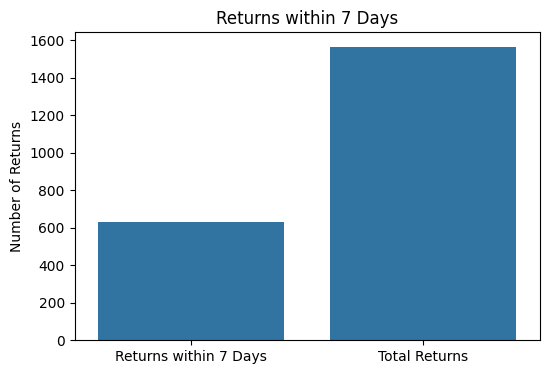

In [ ]:
# Visualization
plt.figure(figsize=(6, 4))
sns.barplot(x=['Returns within 7 Days', 'Total Returns'], y=[len(returns_within_7_days), returned_sales])
plt.title('Returns within 7 Days')
plt.ylabel('Number of Returns')
plt.show()


In [ ]:
# 5. Average Number of Days for a Return to Occur
average_days_for_return = merged_df['ReturnDays'].mean()
print(f"Average number of days for a return to occur: {average_days_for_return:.2f} days")

Average number of days for a return to occur: 78.44 days


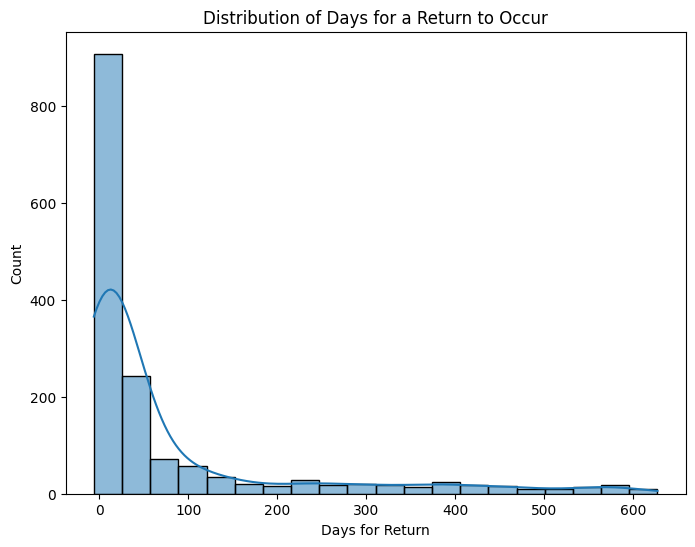

In [ ]:
# Visualization
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['ReturnDays'].dropna(), bins=20, kde=True)
plt.title('Distribution of Days for a Return to Occur')
plt.xlabel('Days for Return')
plt.show()

In [ ]:
# 6. Most Valuable Customer
customer_sales = sales_df.groupby('CustomerID')['Sales'].sum()
most_valuable_customer = customer_sales.idxmax()
most_valuable_customer_sales = customer_sales.max()
print(f"Most valuable customer: {most_valuable_customer} with total sales of {most_valuable_customer_sales:.2f}")

Most valuable customer: RIVES87271 with total sales of 86441.72


In [ ]:
# Assuming you have already executed the code to identify the most valuable customer

# Create a DataFrame with the most valuable customer information
most_valuable_df = pd.DataFrame({'CustomerID': [most_valuable_customer], 'Total Sales': [most_valuable_customer_sales]})

# Save the DataFrame to a CSV file
most_valuable_df.to_csv('most_valuable_customer.csv', index=False)  # Save without index

print(f"Most valuable customer information saved to 'most_valuable_customer.csv'")


Most valuable customer information saved to 'most_valuable_customer.csv'


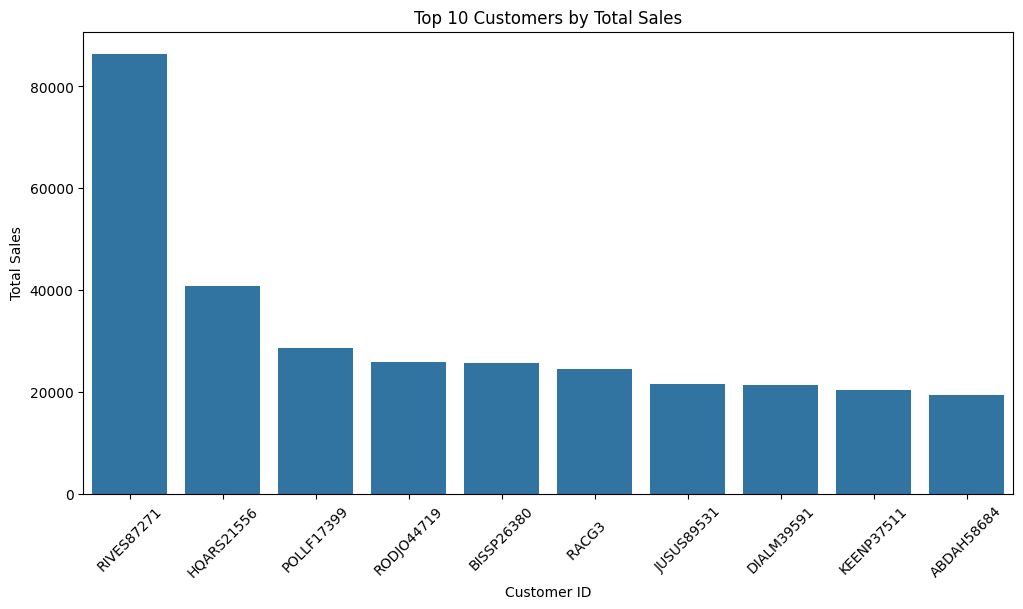

In [ ]:
# Visualization
top_customers = customer_sales.nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_customers.index, y=top_customers.values)
plt.title('Top 10 Customers by Total Sales')
plt.xlabel('Customer ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()